<a href="https://colab.research.google.com/github/Graviton12/CS-430-Group-Project/blob/main/invasive_2021_2024_clean_ty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
invasive_data_2021 = pd.read_excel('/content/drive/MyDrive/CS430/Olmsted Project/olmstead_dataset.xlsx', sheet_name='2021 Cherokee Invasive Survey', skiprows=1)

In [84]:
invasive_data_2021.head()

,Trimble\nStation,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,Lonicera japonica,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present
0,1,37,5,23,90.0,40.30,59.70,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,...,0,3,0,0,0,1,3,0,0,1.0
1,2,8,4,3,5.0,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder,",1,...,0,4,0,0,0,2,1,0,0,0.0
2,3,10,6,13,17.0,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,...,0,4,0,0,0,2,1,0,0,0.0
3,4,6,3,8,3.0,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,...,0,3,0,0,0,3,3,0,0,0.0
4,5,25,23,30,22.0,26.00,74.00,Basswood locust red oak ash?,Buckeye Spicebush ash sapling,3,...,1,3,0,0,1,1,3,0,0,0.0


In [85]:
invasive_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Trimble
Station                            164 non-null    int64  
 1   N                                          164 non-null    int64  
 2   E                                          164 non-null    int64  
 3   S                                          164 non-null    int64  
 4   W                                          163 non-null    float64
 5   Calculated using formula in densiometer    164 non-null    float64
 6   Calculated using formula in densiometer.1  164 non-null    float64
 7   Canopy                                     164 non-null    object 
 8   Understory                                 164 non-null    object 
 9   Lonicera japonica                          164 non-null    int64  
 10  Microstegium vimineum     

In [86]:
#dropping N, E, S, W, Canopy, Understory, and "Canopy gap and/or downed trees present" columns from data


In [87]:
invasive_data_2021.drop(['N', 'E', 'S', 'W', 'Calculated using formula in densiometer', 'Canopy', 'Understory', 'Canopy gap and/or downed trees present'], axis=1, inplace=True)

In [88]:
#renaming Calculated using formula in densiometer.1 to average_canopy_cover
invasive_data_2021.rename(columns={'Calculated using formula in densiometer.1': 'average_canopy_cover'}, inplace=True)

In [89]:
invasive_data_2021.head()

,Trimble\nStation,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,1,59.70,2,1,0,3,1,2,0,3,0,0,0,1,3,0,0
1,2,94.80,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0
2,3,88.04,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0
3,4,94.80,1,0,0,3,0,0,0,3,0,0,0,3,3,0,0
4,5,74.00,3,0,0,3,0,0,1,3,0,0,1,1,3,0,0


In [90]:
# creating a column invasive_sum where each from is the sum from columns 2-16\
invasive_data_2021['invasive_sum'] = invasive_data_2021.iloc[:, 2:17].sum(axis=1)
invasive_data_2021.head()

,Trimble\nStation,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,invasive_sum
0,1,59.70,2,1,0,3,1,2,0,3,0,0,0,1,3,0,0,16
1,2,94.80,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0,8
2,3,88.04,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0,8
3,4,94.80,1,0,0,3,0,0,0,3,0,0,0,3,3,0,0,13
4,5,74.00,3,0,0,3,0,0,1,3,0,0,1,1,3,0,0,15


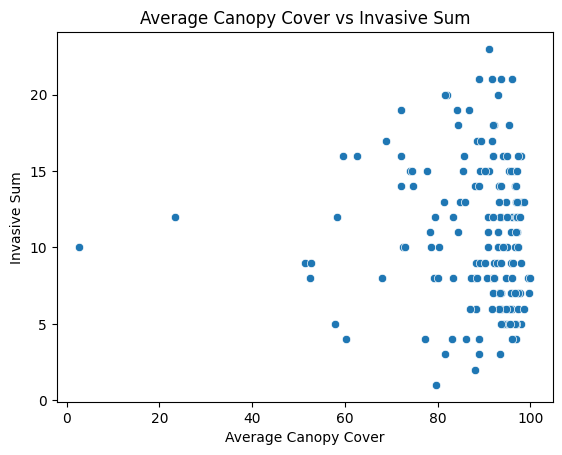

In [91]:
sns.scatterplot(x='average_canopy_cover', y='invasive_sum', data=invasive_data_2021)
#adding a trend line
plt.title('Average Canopy Cover vs Invasive Sum')
plt.xlabel('Average Canopy Cover')
plt.ylabel('Invasive Sum')
plt.show()

In [92]:
#checking the correlation between average canopy cover and invasive sum
invasive_data_2021['average_canopy_cover'].corr(invasive_data_2021['invasive_sum'])

-0.02980054143504391

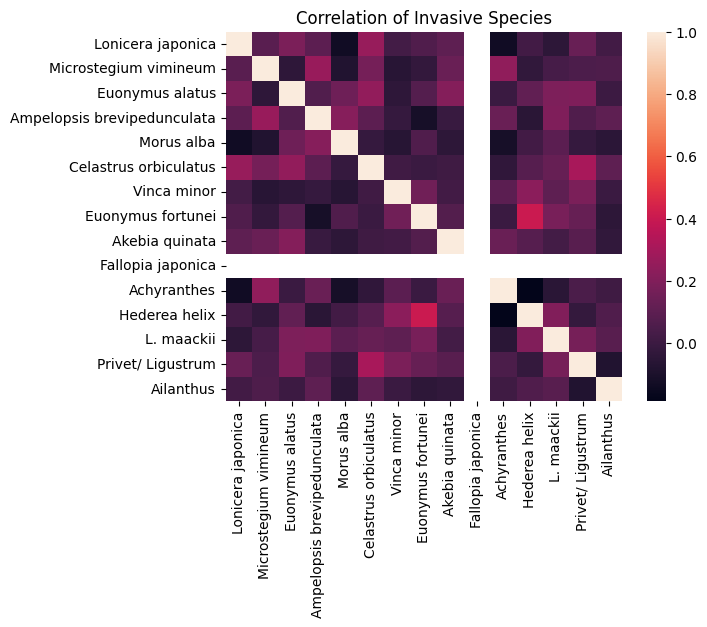

<Figure size 2000x2000 with 0 Axes>

In [93]:
# plotting the correlation of columns 2-16 into heatmap, making it larger
sns.heatmap(invasive_data_2021.iloc[:, 2:17].corr())
plt.title('Correlation of Invasive Species')
plt.figure(figsize=(20,20))
plt.show()


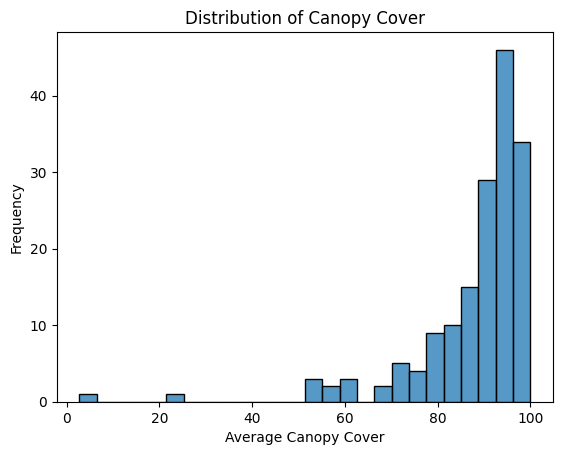

In [94]:
#distribution of canopy cover
sns.histplot(invasive_data_2021['average_canopy_cover'])
plt.title('Distribution of Canopy Cover')
plt.xlabel('Average Canopy Cover')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Trimble\nStation', ylabel='average_canopy_cover'>

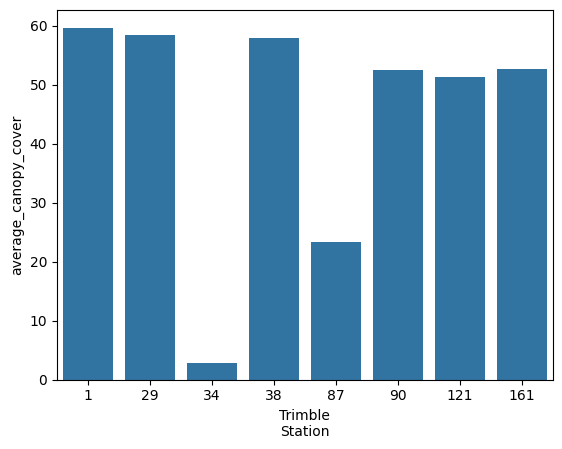

In [95]:
#bar plot of trimble stations with canopy cover less than 60%
sns.barplot(x='Trimble\nStation', y='average_canopy_cover', data=invasive_data_2021[invasive_data_2021['average_canopy_cover'] < 60])

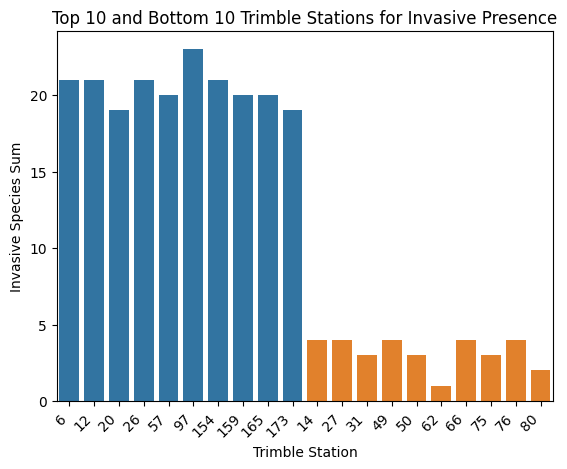

In [96]:
#plotting trible station invasive species sum... the top 10, sorting from largest to smallest ... adding a gap between columns
sns.barplot(x='Trimble\nStation', y='invasive_sum', data=invasive_data_2021.sort_values(by='invasive_sum', ascending=False).head(10))
#plotting the trimble station invasive species sum bottom 10
sns.barplot(x='Trimble\nStation', y='invasive_sum', data=invasive_data_2021.sort_values(by='invasive_sum', ascending=False).tail(10))
plt.title('Top 10 and Bottom 10 Trimble Stations for Invasive Presence')
plt.xlabel('Trimble Station')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Invasive Species Sum')
plt.show()

# 2024 Data

In [97]:
invasive_data_2024 = pd.read_excel('/content/drive/MyDrive/CS430/Olmsted Project/olmstead_dataset.xlsx', sheet_name='2024 Invasive Survey Cherokee', skiprows=1)

In [98]:
invasive_data_2024.head()

,Station,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,Lonicera japonica,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM,Dioscorea polystachya,Unnamed: 27
0,Cherokee1,12.0,3,5,7,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,...,0.0,1.0,3.0,3.0,0.0,0.0,2.0,20,NaN,NaN
1,Cherokee2,3.0,0,2,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,15,NaN,NaN
2,Cherokee3,1.0,0,4,5,2.60,97.40,"Oak, basswood, maple","Maple, ash",3.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,10,NaN,NaN
3,Cherokee4,13.0,3,4,6,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,...,0.0,4.0,2.0,1.0,0.0,2.0,1.0,19,NaN,1.0
4,Cherokee5,15.0,12,3,20,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,NaN,NaN


In [99]:
invasive_data_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Station                                    147 non-null    object 
 1   N                                          146 non-null    float64
 2   E                                          147 non-null    int64  
 3   S                                          147 non-null    int64  
 4   W                                          147 non-null    int64  
 5   Calculated using formula in densiometer    145 non-null    float64
 6   Calculated using formula in densiometer.1  145 non-null    float64
 7   Canopy                                     147 non-null    object 
 8   Understory                                 147 non-null    object 
 9   Lonicera japonica                          146 non-null    float64
 10  Microstegium vimineum     

In [100]:
#dropping canopy and understory columns
#dropping n, e, s, w, and downed tree column
invasive_data_2024.drop(['N', 'E', 'S', 'W', 'Canopy gap and/or downed trees present', 'SUM', 'Canopy', 'Understory', 'Calculated using formula in densiometer'], axis=1, inplace=True)

In [101]:
#dropping the last two columns of the dataset
invasive_data_2024.drop(invasive_data_2024.columns[-2:], axis=1, inplace=True)

In [102]:
invasive_data_2024.isna().sum()

,0
Station,0
Calculated using formula in densiometer.1,2
Lonicera japonica,1
Microstegium vimineum,1
Euonymus alatus,1
Ampelopsis brevipedunculata,1
Morus alba,1
Celastrus orbiculatus,1
Vinca minor,1
Euonymus fortunei,1


In [103]:
#renaming Calculated using formula in densiometer.1 to average_canopy_cover
invasive_data_2024.rename(columns={'Calculated using formula in densiometer.1': 'average_canopy_cover'}, inplace=True)

In [104]:
invasive_data_2024.head()

,Station,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,Cherokee1,92.98,1.0,2.0,0.0,3.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0
1,Cherokee2,98.18,4.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0
2,Cherokee3,97.40,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
3,Cherokee4,93.24,1.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0
4,Cherokee5,87.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [105]:
invasive_data_2024.isna().sum()

,0
Station,0
average_canopy_cover,2
Lonicera japonica,1
Microstegium vimineum,1
Euonymus alatus,1
Ampelopsis brevipedunculata,1
Morus alba,1
Celastrus orbiculatus,1
Vinca minor,1
Euonymus fortunei,1


In [106]:
#filling out missing values for all columns with 0
invasive_data_2024.fillna(0, inplace=True)

In [125]:
#Removing 'Cherokee' from beginning of 'Station' column
invasive_data_2024['Station'] = invasive_data_2024['Station'].str.replace('Cherokee', '')

In [126]:
invasive_data_2024.head()

,Station,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,invasive_sum,change_in_invasive_sum,percentage_change
0,1,92.98,1.0,2.0,0.0,3.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,20.0,4.0,25.000000
1,2,98.18,4.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,15.0,7.0,87.500000
2,3,97.40,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,10.0,2.0,25.000000
3,4,93.24,1.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,19.0,6.0,46.153846
4,5,87.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0,-8.0,-53.333333


In [109]:
# creating a column invasive_sum where each from is the sum from columns 2-16\
invasive_data_2024['invasive_sum'] = invasive_data_2024.iloc[:, 2:17].sum(axis=1)
invasive_data_2024.head()

,Station,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,invasive_sum
0,Cherokee1,92.98,1.0,2.0,0.0,3.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0,20.0
1,Cherokee2,98.18,4.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0,15.0
2,Cherokee3,97.40,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,10.0
3,Cherokee4,93.24,1.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0,19.0
4,Cherokee5,87.00,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.0


In [114]:
#correlation for average_canopy_cover and invasive_sum
invasive_data_2024['average_canopy_cover'].corr(invasive_data_2024['invasive_sum'])

-0.10228056279665475

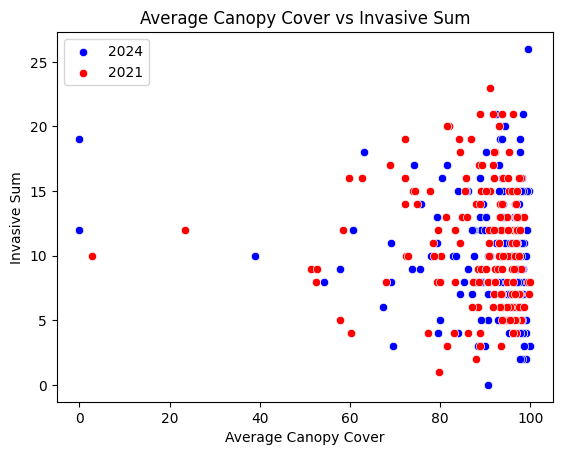

In [113]:
#creating a scatterplot with both the invasive_data_2024 and invasive_data_2021 dataframes
plt.title('Average Canopy Cover vs Invasive Sum')
plt.xlabel('Average Canopy Cover')
plt.ylabel('Invasive Sum')
sns.scatterplot(x='average_canopy_cover', y='invasive_sum', data=invasive_data_2024, color='blue')
sns.scatterplot(x='average_canopy_cover', y='invasive_sum', data=invasive_data_2021, color='red')
#adding a legend for the year
plt.legend(['2024', '2021'])
plt.show()

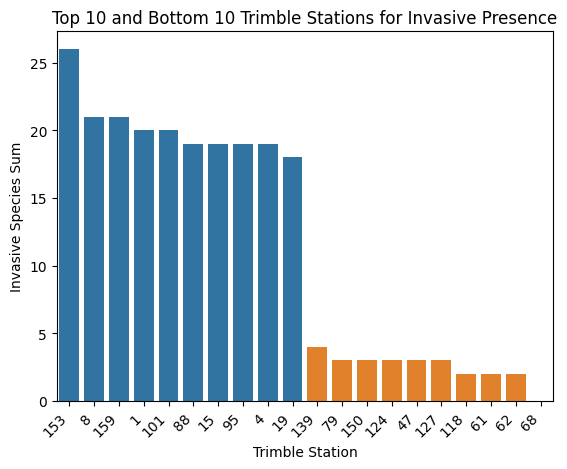

In [127]:
#plotting trible station invasive species sum... the top 10, sorting from largest to smallest ... adding a gap between columns
sns.barplot(x='Station', y='invasive_sum', data=invasive_data_2024.sort_values(by='invasive_sum', ascending=False).head(10))
#plotting the trimble station invasive species sum bottom 10
sns.barplot(x='Station', y='invasive_sum', data=invasive_data_2024.sort_values(by='invasive_sum', ascending=False).tail(10))
plt.title('Top 10 and Bottom 10 Trimble Stations for Invasive Presence')
plt.xlabel('Trimble Station')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Invasive Species Sum')
plt.show()